**Disclaimer: This package is under development and does not have a stable version. This tutorial may be out of date.**

The package should first be installed by running

`python setup.py develop`

from the main package directory. It can then be imported. Note that dependencies are not automatically installed yet, so you may encounter import errors for packages like `lightkurve`, `starry`, `astropy`. Make sure you have the most recent version of each of these to successfully run all of the methods shown below.

In [2]:
import giants as g

The object we will be interacting with is called a `Giant` (for now). This object has methods we can use to identify and vet planet candidates.

In [3]:
target = g.Giant()
#fits_file = 'input tesscut file'
#target2 = g.CPM(fits_file)

Run the `plot` function by passing in a TIC ID. For disambiguation between catalogs on MAST, use the format `'TIC #########'`

Creating light curve for target 49924227 for sectors [7].
Inflating...


100%|██████████| 1093/1093 [00:08<00:00, 131.02it/s]


flux: 0.9998352092753662
period: 11.924812030075188 t0: 2.318185338670986 duration: 0.16


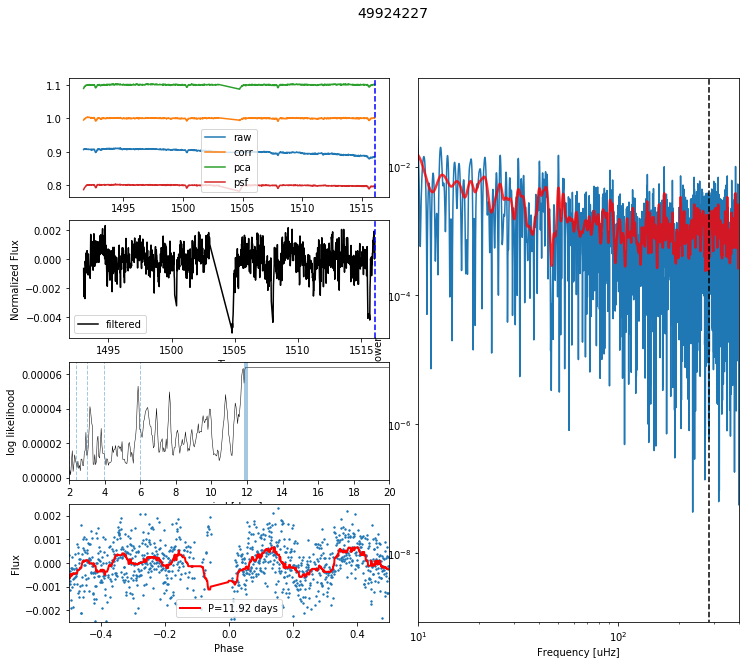

In [4]:
target.plot(ticid='49924227')

19.200000000000003


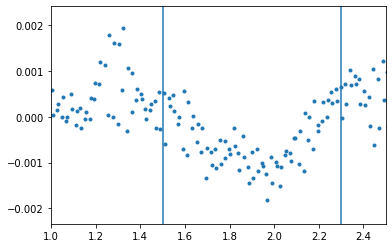

In [56]:
import matplotlib.pyplot as plt
plt.plot(target.lc.time%9.65, target.lc.flux, '.')
plt.axvline(2.3)
plt.axvline(1.5)
plt.xlim(1,2.5)
print((0.8)*24)

Now the target information is stored in the `Giant` object, and we can call the other vetting functions.

In [4]:
target.validate_transit()

period: 2.857142857142857


TypeError: __init__() missing 1 required positional argument: 'map'

##### This looks like a false positive. 

**Note: this transit model is a very rough mock-up of the physical system. The stellar radius is fixed by `starry`, leading to inaccurate estimates of transit depth and duration. This tool should be used only to confirm that predicted transit times are not strongly correlated with systematics. (It should be improved at a later date.)**

In [ ]:
target.validate_ktransit()

/Users/skgrunblatt/giants/giants/giants.py:568: TableReplaceWarning: converted column 'Source' from integer to float
  fig = add_gaia_figure_elements(tpf, fig)
/Users/skgrunblatt/giants/giants/giants.py:568: TableReplaceWarning: converted column 'Dup' from integer to float
  fig = add_gaia_figure_elements(tpf, fig)


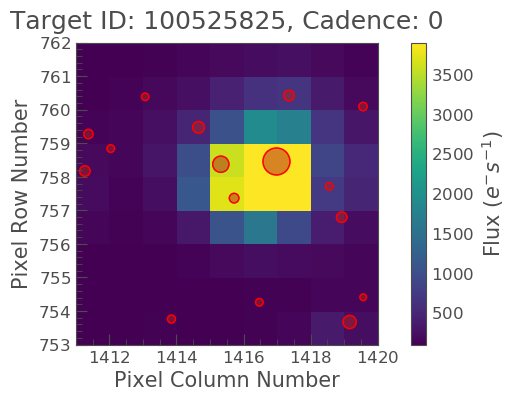

In [55]:
target.plot_gaia_overlay()

You can also call the plotting functions directly on other individual targets:

Creating light curve for target 188628503 for sectors [2].
Inflating...


100%|██████████| 1245/1245 [00:13<00:00, 95.49it/s]
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: divide by zero encountered in true_divide
  lc.flux = lc.flux / np.nanmedian(lc.flux)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: invalid value encountered in true_divide
  lc.flux = lc.flux / np.nanmedian(lc.flux)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: divide by zero encountered in true_divide
  lc.flux = lc.flux / np.nanmedian(lc.flux)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: invalid value encountered in true_divide
  lc.flux = lc.flux / np.nanmedian(lc.flux)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: divide by zero encountered in true_divide
  lc.flux = lc.flux / np.nanmedian(lc.flux)
//anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:545: RuntimeWarning: inva

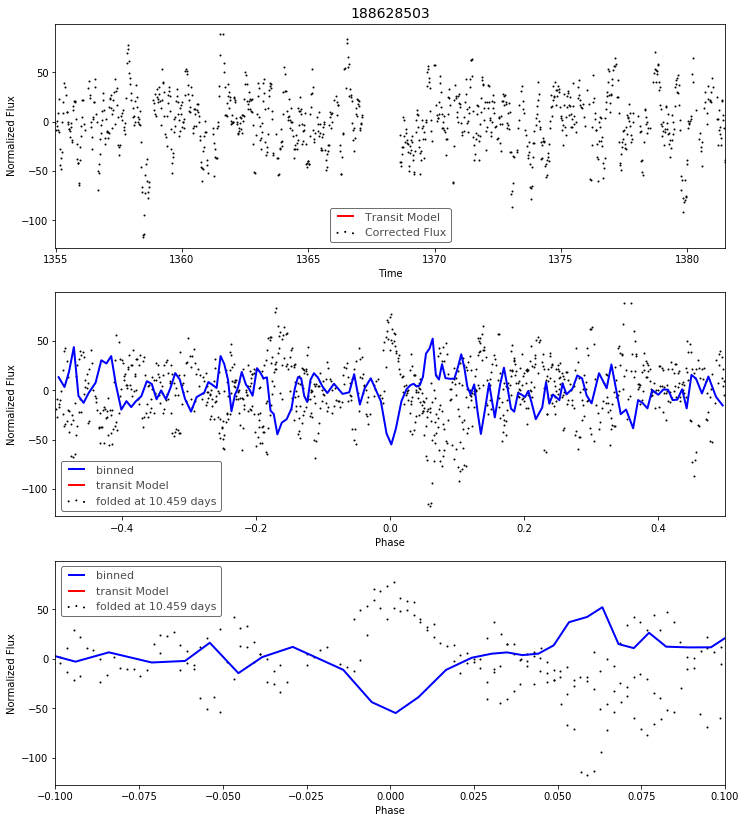

In [6]:
target.validate_transit(ticid=188628503)

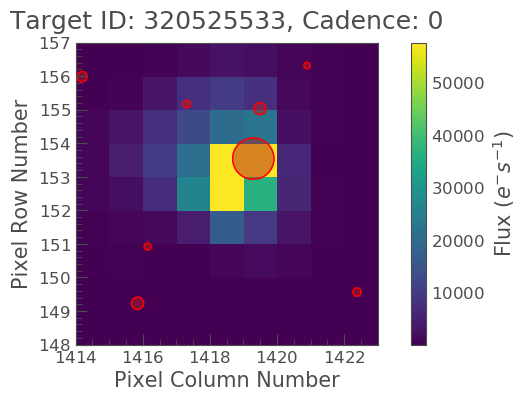

In [63]:
target.plot_gaia_overlay(ticid='320525533')

In [9]:
from multiprocessing import Pool

p = Pool(8)

p.map(target.plot, ['TIC40085745', 'TIC441054538','TIC176956893'])

Creating light curve for target 40085745 for sectors [3].
Creating light curve for target 441054538 for sectors [2].
Creating light curve for target 176956893 for sectors [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12].
Inflating...
Inflating...
Inflating...


Process ForkPoolWorker-16:
Process ForkPoolWorker-20:
Process ForkPoolWorker-22:
Process ForkPoolWorker-19:
Process ForkPoolWorker-17:
Process ForkPoolWorker-21:
Process ForkPoolWorker-18:
  File "//anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "//anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _b

KeyboardInterrupt: 

  File "//anaconda3/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "//anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "//anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "//anaconda3/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "//anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, **kwds))
  File "//anaconda3/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "//anaconda3/lib/python3.7/multiprocessing/pool.py", line 121, in worker
    result = (True, func(*args, 